# Setup and correlations between metrics

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *


In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure1/'
with open(picklepath+ 'W1118Dark_e.pickle', 'rb') as f:
            W1118Dark_e = pickle.load(f)
with open(picklepath + 'W1118Dark_ele.pickle', 'rb') as f:
            W1118Dark_ele = pickle.load(f)
W1118Dark_ele.outputFolder = imagepath + '/W1118Dark/'
cm = W1118Dark_ele.cm

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_92445/2653802299.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_92445/2653802299.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
Fontconfig warning: ignoring UTF-8: not a valid region tag


# Figure 1

## Figure 1 e-g

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_92445/3925614118.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.axes[i].set_xticklabels(a.axes[i].get_xticklabels(), font = 'inter', fontsize = 10)


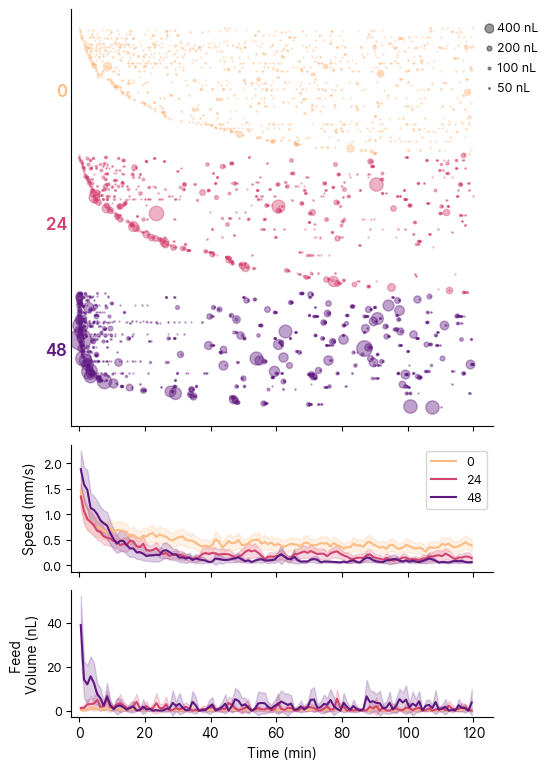

In [ ]:
setFont('inter', 9)

WTStarvedPalette = {'0':sns.color_palette("magma")[5], '24':sns.color_palette("magma")[3], '48':sns.color_palette("magma")[1]}

a, b, c = W1118Dark_ele.plotStacked(endMin = 120, metricsToStack = ['Speed', 'Volume'], colorBy = 'Starvedhrs', 
                          customPalette = WTStarvedPalette, 
                                    figsize = [14*cm, 20*cm], dotratio = 30, plotNonFeeders=True, dotbase=1, ribbonLegend = True)
[a.axes[i].grid(visible=None) for i in range(-3, -1)]

a.axes[0].legend()
for i in range(2):
    a.axes[i].set_ylabel(a.axes[i].get_ylabel(), font = 'inter', fontsize = 10)
    a.axes[i].set_xlabel(a.axes[i].get_xlabel(), font = 'inter', fontsize = 10)
    a.axes[i].set_xticklabels(a.axes[i].get_xticklabels(), font = 'inter', fontsize = 10)
a.axes[0].legend()
a.savefig(W1118Dark_ele.outputFolder+'/stacked.svg')

## Figure 1 j - o

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


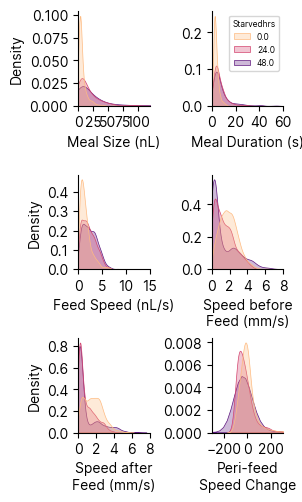

In [ ]:
setFont('inter', 10)

WTStarvedPaletteFloat = {'0.0':sns.color_palette("magma")[5], '24.0':sns.color_palette("magma")[3], '48.0':sns.color_palette("magma")[1]}

histMetrics = {'FeedVol_nl':'Meal Size (nL)',
               'revisedFeedDuration_s':'Meal Duration (s)', 
               'FeedSpeed_nl/s': 'Feed Speed (nL/s)',
               '120beforeFeedSpeed_mm/s':'Speed before\nFeed (mm/s)',
               '120afterFeedSpeed_mm/s':'Speed after\nFeed (mm/s)',
                '120afterPercSpeedGain': 'Peri-feed\nSpeed Change'               
              }
xlim = {'FeedVol_nl':[0, 120],
               'revisedFeedDuration_s':[0, 60], 
                'FeedSpeed_nl/s': [0, 15],
               '120beforeFeedSpeed_mm/s':[0, 8],
               '120afterFeedSpeed_mm/s':[0, 8],
                '120afterPercSpeedGain': [-300, 300]               

       }

f, axes = plt.subplots(3, 2)
f.set_size_inches(3, 5)

setFont('inter', 6)
n= 0
for m in histMetrics.keys():
    segDf = W1118Dark_ele.feedsRevisedDf.melt(value_vars = [m], id_vars = ['ChamberID', 'Starvedhrs']).dropna().sort_values(by = 'Starvedhrs')
    # sns.histplot(segDf, x = 'value', ax = axes.flatten()[0], bins = 20, alpha = .2, hue='Starvedhrs')
    sns.kdeplot(segDf, x = 'value', ax = axes.flatten()[n], hue='Starvedhrs', palette=WTStarvedPaletteFloat, 
                fill=True, common_norm=False,
   alpha=.3, linewidth=.5,)
    axes.flatten()[n].locator_params(nbins=5)
    if n != 1:
        axes.flatten()[n].legend().remove()
    # else:
    #     axes.flatten()[n].legend().get_texts()[0].set_text('0')
    #     axes.flatten()[n].legend().get_texts()[1].set_text('24')
    #     axes.flatten()[n].legend().get_texts()[2].set_text('48')
    axes.flatten()[n].set_xlabel(histMetrics[m])
    if n%2 == 1:
        axes.flatten()[n].set_ylabel('')
    else:
        axes.flatten()[n].set_ylabel('Density')
    axes.flatten()[n].set_xlim(xlim[m])
    axes.flatten()[n].spines[['right', 'top']].set_visible(False)
    n = n+1
f.tight_layout()
# axes[0].set_xlim(-0.001, 0.07)
# axes[0].set_xlabel('Meal Size (ul)')

# sns.histplot(W1118Dark_ele.feedsRevisedDf['FeedDuration_s'], ax = axes[1], stat = 'density', alpha = .2)
# sns.kdeplot(W1118Dark_ele.feedsRevisedDf['FeedDuration_s'], ax = axes[1])
# axes[1].set_xlim(-0.01, 40)
# axes[1].set_ylabel('')
# axes[1].set_xlabel('Meal Duration (s)')

# sns.histplot(W1118Dark_ele.feedsRevisedDf['FeedSpeed_nl/s'], ax = axes[2], stat = 'density', alpha = .2)
# sns.kdeplot(W1118Dark_ele.feedsRevisedDf['FeedSpeed_nl/s'], ax = axes[2])
# axes[2].set_xlim(-0.1, 10)
# axes[2].set_ylabel('')
# axes[2].set_xlabel('Feed Speed (nl/s)')
# f.tight_layout()
# f.savefig(W1118Dark_ele.outputFolder+'/hists.svg', bbox_inches='tight', pad_inches=0)
f.savefig(W1118Dark_ele.outputFolder+'/histsSpeeds.svg', bbox_inches='tight', pad_inches=0)

## Figure 1i

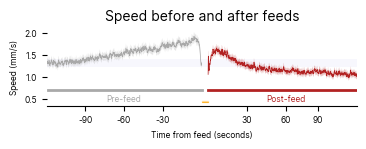

In [ ]:
def flyIDConvert(inputFlyID, summary, F2C = True):
    if F2C:
        feedLogDate = inputFlyID.split('_')[0]+ '_'+ inputFlyID.split('_')[1]
        try:
            countLogDate = summary.loc[summary['feedLogDate']==feedLogDate]['countLogDate'].values[0]
            flyID = inputFlyID.split('Chamber')[1]
            outputFlyID = countLogDate+'_Ch'+flyID+'_Obj1'
        except ValueError:
            print("This feedLog doesn't exist.")
    else:
        countLogDate = inputFlyID.split('_')[0]+ '_'+inputFlyID.split('_')[1]
        try:
            feedLogDate = summary.loc[summary['countLogDate']==countLogDate]['feedLogDate'].values[0]
            flyID = inputFlyID.split('_')[2].split('Ch')[2]
            outputFlyID = feedLogDate+'_Chamber'+flyID+'_Obj1'
        except ValueError:
            print("This countlog doesn't exist.")
    return outputFlyID
    
preSpeedDf = pd.DataFrame(np.nan, index=range(0, 2401), columns=W1118Dark_ele.feedsRevisedDf.dropna().index)
postSpeedDf = pd.DataFrame(np.nan, index=range(2501, 4902), columns=W1118Dark_ele.feedsRevisedDf.dropna().index)

for i in range(len(W1118Dark_ele.feedsRevisedDf.dropna())):
    fly = W1118Dark_ele.feedsRevisedDf.iloc[i]
    countLogFly = flyIDConvert(fly['ChamberID'], W1118Dark_ele.experimentSummary, F2C = True)
    column = W1118Dark_ele.countLogDf.filter(regex = countLogFly +'_V' )
    preStretch = column[fly['startMonitorIdx']: fly['startFeedIdx']].values
    preSpeedDf.iloc[(2401-len(preStretch))::, i] = preStretch.flatten()
    postStretch = column[fly['endFeedIdxRevised']: fly['endMonitorIdx']].values
    if len(postStretch)<=2401:
        postSpeedDf.iloc[0:len(postStretch), i] = postStretch.flatten()


n = len(preSpeedDf.columns)
preplus = preSpeedDf.mean(axis = 1) + preSpeedDf.std(axis = 1)/np.sqrt(n)*1.96
preminus = preSpeedDf.mean(axis = 1) - preSpeedDf.std(axis = 1)/np.sqrt(n)*1.96
postplus = postSpeedDf.mean(axis = 1) + postSpeedDf.std(axis = 1)/np.sqrt(n)*1.96
postminus = postSpeedDf.mean(axis = 1) - postSpeedDf.std(axis = 1)/np.sqrt(n)*1.96
duringplus = W1118Dark_ele.feedsRevisedDf['duringFeedSpeed_mm/s'].mean() + W1118Dark_ele.feedsRevisedDf['duringFeedSpeed_mm/s'].std()/np.sqrt(n)*1.96
duringminus =W1118Dark_ele.feedsRevisedDf['duringFeedSpeed_mm/s'].mean() - W1118Dark_ele.feedsRevisedDf['duringFeedSpeed_mm/s'].std()/np.sqrt(n)*1.96


speedRibbon = plt.figure(figsize = (4, 1))
plt.fill_between([preSpeedDf.index[10],postSpeedDf.index[-1]] , y1 =[ preminus[10], preminus[10]], y2=[preplus[10], preplus[10]], alpha = 0.3, facecolor = 'lavender')
plt.fill_between(preSpeedDf.index, y1 = preminus, y2=preplus, alpha = 0.3, facecolor = 'darkgray')
plt.plot(preSpeedDf.index, preSpeedDf.mean(axis = 1), linewidth = 0.5, color = 'darkgray')
plt.fill_between(postSpeedDf.index, y1 = postminus, y2=postplus, alpha = 0.3, facecolor = 'firebrick')
plt.plot(postSpeedDf.index, postSpeedDf.mean(axis = 1), linewidth = 0.5, color = 'firebrick')
plt.fill_between(x = [2401, 2501], y1 = [duringminus, duringminus], y2 = [duringplus, duringplus], color = 'orange', alpha = 0.3)
plt.plot([2401, 2501], [W1118Dark_ele.feedsRevisedDf['duringFeedSpeed_mm/s'].mean(), W1118Dark_ele.feedsRevisedDf['duringFeedSpeed_mm/s'].mean()], linewidth = 0.5, color = 'orange')
plt.xlim([10, 4800])
plt.xticks([600, 1200, 1800, 3100, 3700,  4200], ['-90', '-60', '-30', '30', '60', '90'])
plt.plot([20, 2401], [.7, .7], linewidth = 2, color = 'darkgray')
plt.plot([2501, 4800], [.7, .7], linewidth = 2, color = 'firebrick')
plt.text(1200, .45, 'Pre-feed', ha = 'center', color = 'darkgray')
plt.text(3700, .45,'Post-feed', ha = 'center', color = 'firebrick')
plt.title('Speed before and after feeds', fontsize = 10)
plt.xlabel('Time from feed (seconds)')
plt.ylabel('Speed (mm/s)')
speedRibbon.axes[0].spines[['right', 'top', 'left']].set_visible(False)
speedRibbon.savefig(W1118Dark_ele.outputFolder+'/perifeedspeedribbon.svg', bbox_inches='tight', pad_inches=0)

## Figure 1 Assembly

In [ ]:
## from svgutils.compose import *

Figure1 = Figure("25cm", "16.5cm", 
    Panel(SVG(figurepath + 'cartoons/setup.svg').scale(0.018),
    Text("a", 0, 0.7, size=0.6, font = 'inter', weight='bold') ).move(.5, .2),
                 
    Panel(SVG(figurepath + 'Raw feed examples/Eg16_0.svg').scale(0.028),
    Text("h", 0, 0.3, size=0.6, font = 'inter', weight='bold') ).move(.5, 5.7),
                 
    Panel(SVG(figurepath + 'Raw feed examples/Eg21_0.svg').scale(0.028),
    Text("", 0, 0.2, size=0.6, font = 'inter', weight='bold') ).move(.5, 8),
                 
    Panel(SVG(figurepath + 'Raw feed examples/Eg28_0.svg').scale(0.028),
    Text("", 0, 0.2, size=0.6, font = 'inter', weight='bold') ).move(.5, 10.5),
                 
    Panel(SVG(W1118Dark_ele.outputFolder +'/perifeedspeedribbon.svg').scale(0.028),
    Text("i", -.5, .1, size=0.6, font = 'inter', weight='bold') ).move(1, 13.3),
                 
    Panel(SVG(figurepath + 'cartoons/egtrace.svg').scale(0.022),
    Text("c", 0, 0.2, size=0.6, font = 'inter', weight='bold') ).move(9.5, .7),
                 
    Panel(SVG(figurepath + 'starvationtimeline.svg').scale(0.022),
    Text("d", 0, 0.2, size=0.6, font = 'inter', weight='bold') ).move(9.5, 3.5),
                 
    Panel(SVG(figurepath + 'cartoons/chipcartoon.svg').scale(0.018),
    Text("b", -.2, 0.4, size=0.6, font = 'inter', weight='bold') ).move(5.5, .5),
    Panel(SVG(W1118Dark_ele.outputFolder+'stacked.svg').scale(0.028),
    Text("Raster plot of feeds", 3.2, .7, size=0.6, font= 'inter', weight='regular'), 
    Text("e", 0.4, 1, size=0.6, font= 'inter', weight='bold'), 
    Text("f", 0.4, 9.3, size=0.6, font= 'inter', weight='bold'),
    Text("g", 0.4, 12.3, size=0.6, font= 'inter', weight='bold')).move(13, 0),
    # Panel(SVG(figurepath + 'starvationtimeline.svg').scale(0.028),
    # Text("x", 0, .3, size=0.6, font = 'inter', weight='bold') ).move(8, 6),

                 
    Panel(SVG(W1118Dark_ele.outputFolder+'/histsSpeeds.svg').scale(0.028),
    Text("j", 0, 0, size=0.6, font = 'inter', weight='bold'),     
    Text("k", 3.4, 0, size=0.6, font= 'inter', weight='bold'),
    Text("l", 0, 3.5, size=0.6, font = 'inter', weight='bold'),     
    Text("m", 3.4, 3.5, size=0.6, font= 'inter', weight='bold'),
    Text("n", 0, 6.5, size=0.6, font = 'inter', weight='bold'),     
    Text("o", 3.4, 6.5, size=0.6, font= 'inter', weight='bold')).move(7.5,  6.2),
 
      ).save(figurepath+"/Figure1.svg")



# Figure 2

## Figure 2 a

In [ ]:
color1 = 'green'
color2 = 'purple'

metricType = {'Starvation':'k', 'Meal Size': color1, 'Feed Speed': color1, 
              'Prefeed Speed': color2,
       'Duringfeed Speed': color2, 'Postfeed Speed': color2, 
              'Meal Duration': color1, 'Volume': color1,
       'Count': color1, 'Duration': color1, 'Latency': color2, 
              'Duringfeed Speed Ratio': color2,
       'Perifeed Speed Ratio': color2, 'Speed': color2, 
              'Height': color2, 'Food Port Occupancy': color2,
       'Ctrl Port Occupancy': color2, 'Falls': color2}

def corrWith(data, sortMetric, metricType, abs = False):
    setFont('Helvetica', 8)

    corr_matrix = data.corr()
    if abs:
        cmap = 'Blues'
        corr_matrix = np.abs(corr_matrix)
        vmin = 0
    else:
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        vmin=-1
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cm2 = corr_matrix.sort_values(by = sortMetric, ascending = False)
    fig, ax = plt.subplots(figsize=(5,4.5)) 
    sns.heatmap(cm2[cm2.index],ax = ax, annot=False, cmap = cmap, mask=mask, vmax = 1, vmin = vmin)
    for i in range(len(cm2.index)):
        ax.get_xticklabels()[i].set_color(metricType[cm2.index[i]])
        ax.get_yticklabels()[i].set_color(metricType[cm2.index[i]])
    plt.tight_layout()

    return fig, ax, cm2



w1118 = pd.read_csv(picklepath + 'W1118Dark_ele.csv')
w1118['Starvation'] = w1118['Starvation'].astype('str')
w1118['Volume'] = w1118['Volume']*1000
w1118['Meal Size'] = w1118['Meal Size']*1000
w1118['Feed Speed'] = w1118['Feed Speed']*1000
data_num0 = w1118.loc[w1118['Starvation']==0]
data_num24 = w1118.loc[w1118['Starvation']==24]
data_num48 = w1118.loc[w1118['Starvation']==48]

vCorr, ax, corrmat = corrWith(w1118.iloc[:, 5::], 'Volume', metricType)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha = 'right');

vCorr.savefig(figurepath+ 'corr_all'+'.svg', dpi = 300)
vCorr.savefig(figurepath+ 'corr_all'+'.png', dpi = 300)

# vCorr, ax, corrmat = corrWith(data_num0.iloc[:, 5::], 'Volume', metricType, abs = True)

# vCorr.savefig(figurepath+ 'corr0'+'.svg', dpi = 300)
# vCorr, ax, corrmat = corrWith(data_num24.iloc[:, 5::], 'Volume', metricType, abs = True)
# vCorr.savefig(figurepath+ 'corr24'+'.svg', dpi = 300)
# vCorr, ax, corrmat = corrWith(data_num48.iloc[:, 5::], 'Volume', metricType, abs = True)
# vCorr.savefig(figurepath+ 'corr48'+'.svg', dpi = 300)


In [ ]:
def confidence_ellipse(x, y, ax, n_std=3.0, plotVector = True, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    import numpy as np
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms
    import matplotlib.pyplot as plt
    import scipy

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    scale = [scale_x, scale_y]
    return scale, ax.add_patch(ellipse)

def regscatter(data, x, y, ax, n_std = 2, scatter = True, fit_reg = True, plotEllipse = False, showTitle = True, color = 'steelblue',  **kwargs):
    setFont('Helvetica', 9)
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    corrResults = scipy.stats.linregress(data[x], data[y])
    if showTitle:
        ax.set_title('r = ' + str(round(corrResults.rvalue, 2)))
    # ax.plot(data[x].mean(), data[y].mean(), 'r.', markersize = 10)
    scale = None
    if plotEllipse:
        scale, ellipse = confidence_ellipse(data[x], data[y],  ax, edgecolor= None, facecolor = 'red', alpha = 0.1, n_std = n_std)
    sns.regplot(x = x, y = y, data = data, ax = ax, scatter = scatter, scatter_kws={'s': 3}, fit_reg= fit_reg, color = color)

    return scale

def plotEigenVectors (data, x, y, ax, scale = [1, 1], plotVs = [0, 1], plotMean = True):
    import numpy as np
    import matplotlib.pyplot as plt
    
    xData = data[x].values
    yData = data[y].values
    xData = np.reshape(xData, (len(xData), 1))
    yData = np.reshape(yData, (len(yData), 1))
    data = np.hstack((xData, yData))
    mu = data.mean(axis=0)
    data = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    colors = ['steelblue', 'seagreen']
    angles = [0, 0]
    for i in plotVs:
        start, end = mu - scale[i] * 2 * eigenvectors[i], mu + scale[i] * 2 * eigenvectors[i]
        ax.plot([start[0], end[0]], [start[1], end[1]], color = colors[i] ) 
        # print(start)
        angles[i] = angle_between(eigenvectors[i], [[0, 1], [0, 0]])
    ax.set_aspect('equal')
    ax.text(ax.get_xlim()[1]*0.7,ax.get_ylim()[1]*0.9, r'$\Theta = %.2f ^\circ$' % angles[0])
    if plotMean:
        ax.plot(mu[0], mu[1], 'ro')

    return angles

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return 180-np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))[1]



def plotScatterGroupBy(data, Metric, yMetric, group_by = None):
    for i in range(len(datasets)):
        conditions = data[group_by].unique()
        datasets[i] = data.loc[data[group_by]==conditions[i]]
    
    fig, axes = plt.subplots(len(datasets), 1, figsize = [5, 8])

    for i in axes:
        i.set_ylim(-0.2, 1.5)
        i.set_xlim(-0.5, 3)
    for i in range(len(datasets)):
        scale = regscatter(datasets[i], x = xMetric, y = yMetric, ax = axes[i], color = 'k')
        angles = plotEigenVectors(datasets[i], x = xMetric, y = yMetric, ax = axes[i], scale = scale, plotVs = [0])
    # scale = regscatter(dark, x = xMetric, y = yMetric, ax = axes[3], color = 'k')
    # angles = plotEigenVectors(dark, x = xMetric, y = yMetric, ax = axes[3], scale = scale, plotVs = [0])
    fig.tight_layout()
    fig.savefig('speedvolumeellipses.png', dpi = 300)



## Figure 2 b

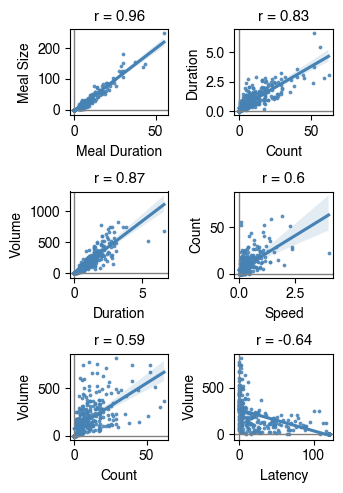

In [ ]:
f, ax = plt.subplots(3, 2)
f.set_size_inches(3.5, 5)
setFont('Helvetica', 6)
scale = regscatter(w1118.iloc[:, 5::], x = 'Meal Duration', y = 'Meal Size', ax = ax[0, 0], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Duration', y = 'Volume', ax = ax[1, 0], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Latency', y = 'Volume', ax = ax[2, 1], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Count', y = 'Volume', ax = ax[2, 0], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Count', y = 'Duration', ax = ax[0, 1], color = 'steelblue')
scale = regscatter(w1118.iloc[:, 5::], x = 'Speed', y = 'Count', ax = ax[1, 1], color = 'steelblue')
f.tight_layout()
f.savefig(figurepath+ 'cooreg'+'.svg', dpi = 300)

# angles = plotEigenVectors(w1118.iloc[:, 5::], x = 'Duration', y = 'Volume', ax = ax, scale = scale, plotVs = [0])


## Figure 2 c - f

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1232: UserWarning: 49.3% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1232: UserWarning: 20.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1232: UserWarning: 76.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1232: UserWarning: 45.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/plot_tools.py:1232: UserWarning: 14.4% of the points cannot be p

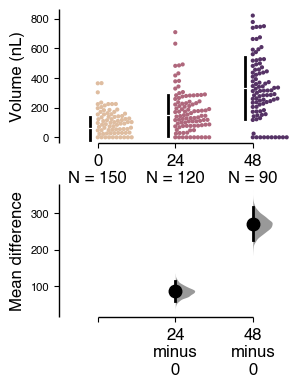

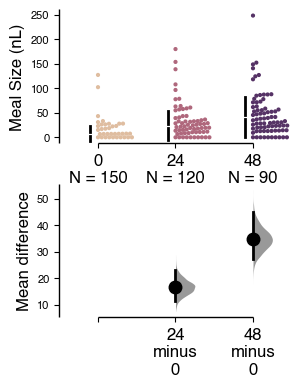

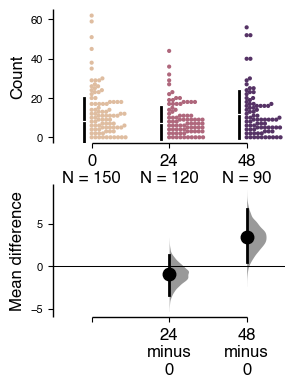

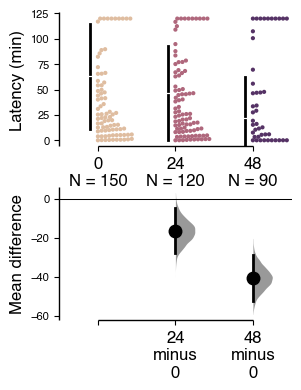

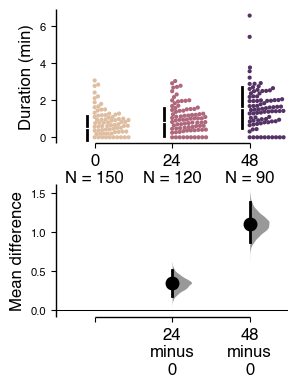

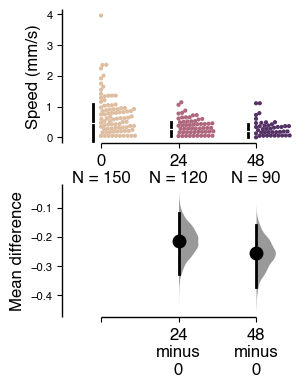

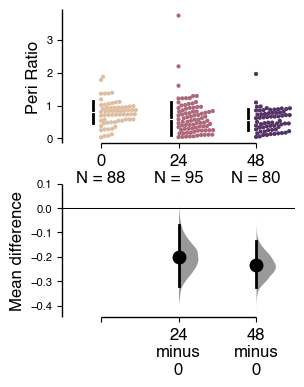

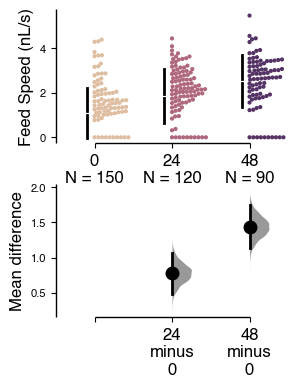

In [ ]:
WTStarvedPalette = {'0':sns.color_palette("magma")[5], '24':sns.color_palette("magma")[3], '48':sns.color_palette("magma")[1]}
setFont('Helvetica', 8)
vWT = dabest.load(w1118, x = 'Starvation', y = 'Volume', idx = ('0', '24', '48'))
fvWT = vWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Volume (nL)', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
fvWT.savefig(figurepath+ 'vWT'+'.svg')

msWT = dabest.load(w1118, x = 'Starvation', y = 'Meal Size', idx = ('0', '24', '48'))
fmsWT = msWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Meal Size (nL)', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
fmsWT.savefig(figurepath+ 'msWT'+'.svg')

cWT = dabest.load(w1118, x = 'Starvation', y = 'Count', idx = ('0', '24', '48'))
fcWT = cWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Count', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
fcWT.savefig(figurepath+ 'cWT'+'.svg')

lWT = dabest.load(w1118, x = 'Starvation', y = 'Latency', idx = ('0', '24', '48'))
flWT = lWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Latency (min)', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
flWT.savefig(figurepath+ 'lWT'+'.svg')

dWT = dabest.load(w1118, x = 'Starvation', y = 'Duration', idx = ('0', '24', '48'))
fdWT = dWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Duration (min)', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
fdWT.savefig(figurepath+ 'dWT'+'.svg')

spWT = dabest.load(w1118, x = 'Starvation', y = 'Speed', idx = ('0', '24', '48'))
fspWT = spWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Speed (mm/s)', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
fspWT.savefig(figurepath+ 'spWT'+'.svg')

periWT = dabest.load(w1118, x = 'Starvation', y = 'Perifeed Speed Ratio', idx = ('0', '24', '48'))
fperiWT = periWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Peri Ratio', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
fperiWT.savefig(figurepath+ 'periRatioWT'+'.svg')

fsWT = dabest.load(w1118, x = 'Starvation', y = 'Feed Speed', idx = ('0', '24', '48'))
ffsWT = fsWT.mean_diff.plot(color_col='Starvation', swarm_label= 'Feed Speed (nL/s)', custom_palette = WTStarvedPalette,  raw_marker_size=1, fig_size = (3, 4))
ffsWT.savefig(figurepath+ 'fsWT'+'.svg')




## Figure 2 g

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/dabest/_effsize_objects.py:297: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(


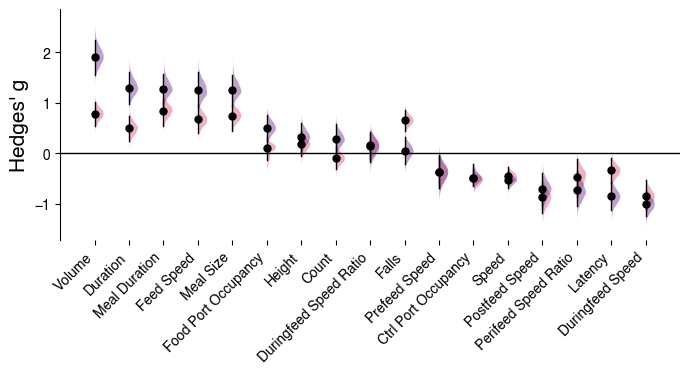

In [ ]:

allmetrics = ['Meal Size',
       'Feed Speed', 'Prefeed Speed', 'Duringfeed Speed', 'Postfeed Speed',
       'Meal Duration', 'Volume', 'Count', 'Duration', 'Latency',
       'Duringfeed Speed Ratio', 'Perifeed Speed Ratio', 'Speed', 'Height',
       'Food Port Occupancy', 'Ctrl Port Occupancy', 'Falls']

allcontrasts = [dabest.load(w1118, x = 'Starvation', y = m, idx = ('0', '24', '48')) for m in allmetrics]
WTbcaHigh = [allcontrasts[i].mean_diff.results.bca_high for i in range(len(allcontrasts))]
WTbcaLow = [allcontrasts[i].mean_diff.results.bca_low for i in range(len(allcontrasts))]
WTbcaMean = [allcontrasts[i].hedges_g.results.difference[1] for i in range(len(allcontrasts))]
order = np.argsort(WTbcaMean)[::-1]
allmetrics_sorted = [allmetrics[o] for o in order]
allcontrasts_sorted = [allcontrasts[o] for o in order]
def plotForestDD(contrasts, exptNames = None, labelX = True, imagepath = None):
    def pickouttestcolor(palette):
        s = [i for i in palette.keys() if 'w1118' not in i]    
        return palette[s[0]]
    DDbootstraps24 = [c.hedges_g.results.bootstraps[0] for c in contrasts]
    DDbootstraps48 = [c.hedges_g.results.bootstraps[1] for c in contrasts]
    setFont('Helvetica', 10)
    fForest = plt.figure(figsize = [8, 3])
    ax = plt.subplot(111)
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,
                                   'showextrema':False, 'showmedians':False}
    v24 = ax.violinplot(DDbootstraps24, **default_violinplot_kwargs)
    v48 = ax.violinplot(DDbootstraps48, **default_violinplot_kwargs)
    dabest.plot_tools.halfviolin(v24, alpha = 0.4)
    dabest.plot_tools.halfviolin(v48, alpha = 0.4)
    for i in range(len(contrasts)):
        ax.collections[i].set_fc(sns.color_palette("magma")[3])
        ax.collections[i+len(contrasts)].set_fc(sns.color_palette("magma")[1])
    ax.plot([0, len(contrasts)+1], [0, 0], 'k', linewidth = 1)
    ticks = list(range(1, len(contrasts)+1))
    for i in ticks:
        ax.plot(i, contrasts[i-1].hedges_g.results.difference[0], 'k.', markersize = 10)
        ax.plot([i, i], [contrasts[i-1].hedges_g.results.bca_low[0], contrasts[i-1].hedges_g.results.bca_high[0]], 'k', linewidth = 1)
        ax.plot(i, contrasts[i-1].hedges_g.results.difference[1], 'k.', markersize = 10)
        ax.plot([i, i], [contrasts[i-1].hedges_g.results.bca_low[1], contrasts[i-1].hedges_g.results.bca_high[1]], 'k', linewidth = 1)

    ax.set_xticks(ticks)
    ax.set_xlim([0, len(contrasts)+1])
    ax.set_xticklabels(allmetrics_sorted,
                      rotation = 45, ha = 'right', fontsize = 10)
    ax.set_ylabel('Hedges\' g', fontsize = 15)
#     ax.set_title(metric.metric, fontsize = 20)
    # ax.set_ylim(-0.5, 0.2)
    ax.spines['bottom'].set_color(None)
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    # ax.spines['left'].set_color(None)


    if exptNames:
        if labelX:
            ax.set_xticklabels(exptNames, 
                               rotation = 45, 
                               ha = 'right',
                               fontsize = 12)
        else:
            ax.set_xticklabels(['']* (i+1))
    
    return fForest

ff = plotForestDD(allcontrasts_sorted)

ff.set_size_inches(10, 4)
ff.tight_layout()
ff.axes[0].text(16, 2, '24 hr', color = sns.color_palette("magma")[3])
ff.axes[0].text(16, 1.8, '48 hr', color = sns.color_palette("magma")[1])
ff.savefig(figurepath+'metricForest.svg')

wtBaseline = pd.DataFrame(np.concatenate([WTbcaLow, WTbcaHigh], axis =1), columns = ['L24', 'L48', 'H24', 'H48'])
wtBaseline['Metric'] = allmetrics
wtBaseline.to_csv(figurepath +  'wtBaseline.csv', index = False)

## Figure 2 Assembly

In [ ]:
## from svgutils.compose import *

Figure("21cm", "25cm", 
    Panel(SVG(figurepath + 'corr_all.svg').scale(0.035),
    Text("a", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'cooreg.svg').scale(0.03),
    Text("bi", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold'), 
    Text("bii", 4.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') , 
    Text("biii", 0.2, 3.8, size=0.4, font = 'Helvetica', weight='bold'),  
    Text("biv", 4.2, 3.8, size=0.4, font = 'Helvetica', weight='bold'),  
    Text("bv", 0.3, 7.4, size=0.4, font = 'Helvetica', weight='bold'),  
    Text("bvi", 4.2, 7.4, size=0.4, font = 'Helvetica', weight='bold'),  ).move(13, 1),
    Panel(SVG(figurepath + 'vWT.svg').scale(0.02),
    Text("c", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') ).move(1, 11.5),
    Panel(SVG(figurepath + 'dWT.svg').scale(0.02),
    Text("d", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') ).move(6, 11.5),
    Panel(SVG(figurepath + 'msWT.svg').scale(0.02),
    Text("e", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') ).move(11, 11.5),
    Panel(SVG(figurepath + 'lWT.svg').scale(0.02),
    Text("f", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') ).move(16, 11.5),
    Panel(SVG(figurepath + 'metricForest.svg').scale(0.025),
    Text("g", 0.2, 0.2, size=0.4, font = 'Helvetica', weight='bold') ).move(1, 17.5),
      ).save(figurepath+"/Figure2.svg")



### 

# | hide
import nbdev; nbdev.nbdev_export()